In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download Indonesian stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("indonesian"))

# Load CSV
data = pd.read_csv("/content/alodokter_halodoc_balanced_8000.csv")

# Step 1: Preprocessing function
def preprocess(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # normalize whitespace
    return text

# Step 2: Apply basic preprocessing
data['clean_review'] = data['review'].apply(preprocess)

# Step 3: Remove stopwords using NLTK's Indonesian list
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['clean_review'] = data['clean_review'].apply(remove_stopwords)

# Step 4: Preview results
print(data[['review', 'clean_review']].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              review  \
0  Q kasih 3 bintang dlu blm tau pelayanannya bag...   
1  Kalo dokter udah oke banget ramah ramah lagi, ...   
2  saya kira gratis rupanya berbayar.. 😅 baik lan...   
3  Agak lama respon nya jika melayani lebih dari ...   
4                          Sayakasih bintang 2 dl ya   
5  𝙪𝙙𝙖𝙝 𝙗𝙖𝙜𝙪𝙨 𝙖𝙥𝙠 𝙣𝙮𝙖 𝙗𝙖𝙧𝙪 𝙘𝙤𝙗𝙖 𝙠𝙞𝙧𝙖𝙞𝙣 𝙩𝙖𝙣𝙮𝙖 𝙩𝙖𝙣𝙮...   
6                                               baik   
7  Daerah cimanggis blm bisa pakai apk ini.. utk ...   
8                         Semoga tdk ada mslh serius   
9                                           Good job   

                                        clean_review  
0     q kasih 3 bintang dlu blm tau pelayanannya mna  
1  kalo dokter udah oke banget ramah ramah beli o...  
2        gratis berbayar langsung rs pukesmas apotik  
3  respon nya melayani sampe dr nya mengahiri jar...  
4                          sayakasih bintang 2 dl ya  
5  𝙪𝙙𝙖𝙝 𝙗𝙖𝙜𝙪𝙨 𝙖𝙥𝙠 𝙣𝙮𝙖 𝙗𝙖𝙧𝙪 𝙘𝙤𝙗𝙖 𝙠𝙞𝙧𝙖𝙞𝙣 𝙩𝙖𝙣𝙮𝙖 𝙩𝙖𝙣𝙮... 

In [2]:
print(data['clean_review'].apply(type).value_counts())

clean_review
<class 'str'>    8000
Name: count, dtype: int64


In [3]:
data.to_csv("preprocessed_data.csv", index=False)

In [4]:
# Manual Labelling
# Create sentiment labels based on the rating
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

# Display sample results
print(data[['review', 'rating', 'sentiment']].head())
data.to_csv("labeled_data (2) (1).csv", index=False)

                                              review  rating sentiment
0  Q kasih 3 bintang dlu blm tau pelayanannya bag...       3  negative
1  Kalo dokter udah oke banget ramah ramah lagi, ...       1  negative
2  saya kira gratis rupanya berbayar.. 😅 baik lan...       1  negative
3  Agak lama respon nya jika melayani lebih dari ...       3  negative
4                          Sayakasih bintang 2 dl ya       2  negative


In [ ]:
label = pd.read_csv("/content/labeled_data (2) (1).csv")
label.head(20)

,application,review,rating,clean_review,sentiment
0,Alodokter,Q kasih 3 bintang dlu blm tau pelayanannya bag...,3,q kasih 3 bintang dlu blm tau pelayanannya bag...,negative
1,Alodokter,"Kalo dokter udah oke banget ramah ramah lagi, ...",1,kalo dokter udah oke banget ramah ramah lagi t...,negative
2,Alodokter,saya kira gratis rupanya berbayar.. 😅 baik lan...,1,saya kira gratis rupanya berbayar baik langsun...,negative
3,Halodoc,Agak lama respon nya jika melayani lebih dari ...,3,agak lama respon nya jika melayani lebih dari ...,negative
4,Halodoc,Sayakasih bintang 2 dl ya,2,sayakasih bintang 2 dl ya,negative
5,Halodoc,𝙪𝙙𝙖𝙝 𝙗𝙖𝙜𝙪𝙨 𝙖𝙥𝙠 𝙣𝙮𝙖 𝙗𝙖𝙧𝙪 𝙘𝙤𝙗𝙖 𝙠𝙞𝙧𝙖𝙞𝙣 𝙩𝙖𝙣𝙮𝙖 𝙩𝙖𝙣𝙮...,3,𝙪𝙙𝙖𝙝 𝙗𝙖𝙜𝙪𝙨 𝙖𝙥𝙠 𝙣𝙮𝙖 𝙗𝙖𝙧𝙪 𝙘𝙤𝙗𝙖 𝙠𝙞𝙧𝙖𝙞𝙣 𝙩𝙖𝙣𝙮𝙖 𝙩𝙖𝙣𝙮...,negative
6,Alodokter,baik,4,baik,positive
7,Halodoc,Daerah cimanggis blm bisa pakai apk ini.. utk ...,4,daerah cimanggis blm bisa pakai apk ini utk ke...,positive
8,Alodokter,Semoga tdk ada mslh serius,4,semoga tdk ada mslh serius,positive
9,Alodokter,Good job,3,good job,negative


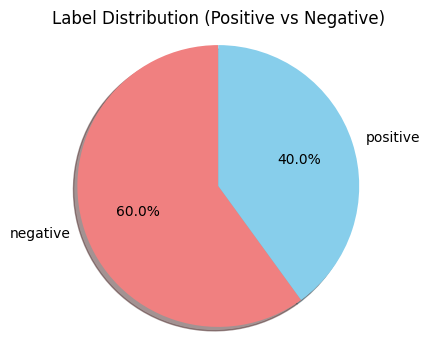

In [ ]:
# Count label occurrences (assumes label column is named 'label')
label_counts = label['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'skyblue'], startangle=90, shadow=True)
plt.title('Label Distribution (Positive vs Negative)')
plt.axis('equal')
plt.show()

In [ ]:
label_counts

,count
sentiment,
negative,4800
positive,3200


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


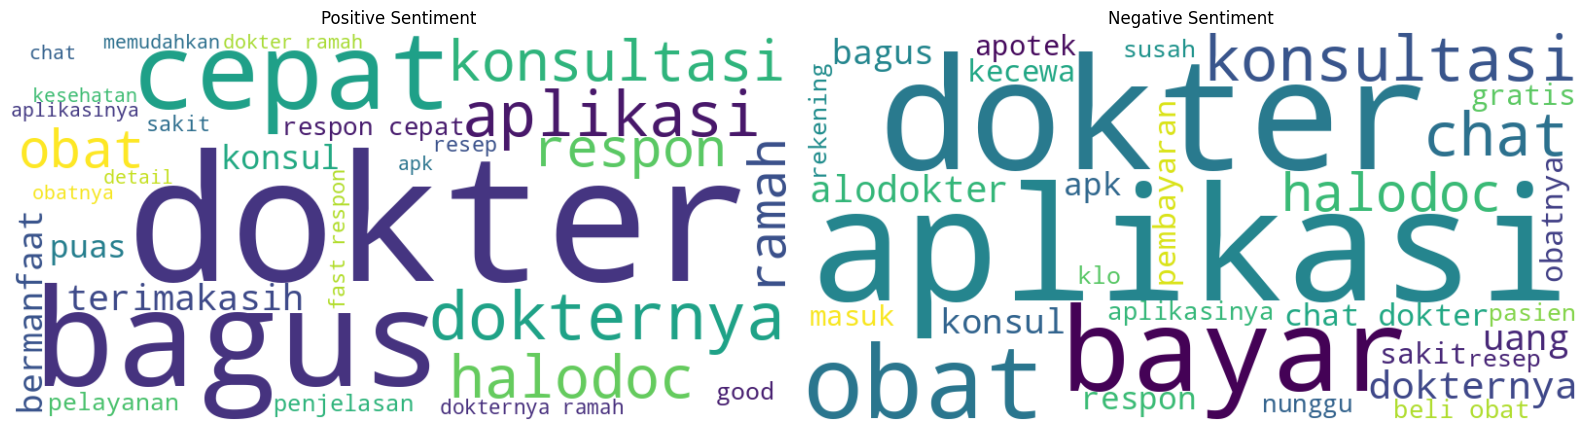

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Download Indonesian stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("indonesian"))

# Add manual/custom stopwords to remove irrelevant or noisy words
custom_stopwords = set([
    "ga", "yg", "kali", "sih", "tp", "aja", "tdk", "ya", "sy", "udh", "utk", "eh", "gitu", "nya", "lg", "nggak", "oke", "karna", "ok", "cuman",
    "kalo", "dgn", "banget", "dr", "gk", "yaa", "gak", "krn", "gimana", "alhamdulillah", "keren", "blm", "dlm", "malam", "pake", "dpt", "via", "biar",
    "bgt", "udah", "enak", "semoga", "pas", "c", "tau", "si", "maaf", "deh", "d", "skrg", "coba", "pdhl", "sm", "gw", "sya", "sdh", "tpi", "dapat", "ngga",
    "lumayan", "membantu", "mudah", "terima", "kasih", "ny", "kadang", "menit", "orang", "alami", "dg", "baguss", "memuaskan", "bikin", "nomor", "parah", "bilang", "hp",
    "mantap", "tolong", "rs", "pahami", "langsung", "cocok", "foto", "dri", "gojek", "dah", "org", "sesi", "buka", "ulang", "doang", "dok", "ko", "nih", "bingung", "jd", "nama",
    "sampe", "mohon", "pakai", "jam", "bintang"
])

# Optional: Stemming using Sastrawi
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load CSV
data = pd.read_csv("/content/labeled_data (2) (1).csv")

# Step 1: Preprocessing function
def preprocess(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # normalize whitespace
    return text

# Step 2: Apply basic preprocessing
data['clean_review'] = data['review'].apply(preprocess)

# Step 3: Stemming (optional but recommended)
# data['clean_review'] = data['clean_review'].apply(lambda x: stemmer.stem(x))

# Step 4: Remove stopwords (standard + custom)
def remove_stopwords(text):
    return ' '.join([
        word for word in text.split()
        if word not in stop_words and word not in custom_stopwords
    ])

data['clean_review'] = data['clean_review'].apply(remove_stopwords)

# Step 5: Optional - lowercase sentiment labels
data['sentiment'] = data['sentiment'].str.lower()

# Step 6: Separate positive and negative reviews
positive_text = ' '.join(data[data['sentiment'] == 'positive']['clean_review'].dropna())
negative_text = ' '.join(data[data['sentiment'] == 'negative']['clean_review'].dropna())

# Step 7: Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', max_words=30).generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', max_words=30).generate(negative_text)

# Step 8: Display side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()